In [1]:
import numpy as np
import pandas as pd

#### df를 생성하세요.

고객별 속성 데이터 

- id: 1번 ~ 100번 일련번호
- gender: 0, 1 정수, 난수 생성
- age: 10 ~ 80 사이 정수 난수를 생성하고 범주화하여 age_cat 파생
- region: 1 ~ 5 사이 난수 생성

거래 데이터 

- id: 1번 ~ 100번 일련번호 (관측치 1000개)
- product: 고급제품(hpd), 일반제품(ldp)로 구분
- price: 100 ~ 200 사이 정수 난수 생성
- qty: 1 ~ 2 사이 정수 난수 생성
- day: 요일
- date: 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount: price * qty 로 산출 


Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요. 

Q3. df를 탐색적 분석을 통하여 인사이트를 도출하세요


In [2]:
np.random.seed(0)
no = np.arange(1,101)
i1 = pd.Series(no)
gender = np.random.randint(2,size=100)
g1 = pd.Series(gender)
age = np.random.randint(10,81,size=100)
a1 = pd.Series(age)
region = np.random.randint(1,6,size=100)
r1 = pd.Series(region)

Cdf = pd.concat([i1,g1,a1,r1],axis=1)
Cdf = Cdf.rename(columns={0:'no',1:'gender',2:'age',3:'region'})
Cdf.head()

,no,gender,age,region
0,1,0,52,4
1,2,1,78,3
2,3,1,16,4
3,4,0,78,3
4,5,1,57,5


In [3]:
def age_cat(x):
    cat = ''
    if x < 20 : cat = 1
    elif x < 30 : cat = 2
    elif x < 40 : cat = 3
    elif x < 50 : cat = 4
    elif x < 60 : cat = 5
    else : cat =6
    return cat
Cdf['age_cat'] = Cdf['age'].apply(lambda x : age_cat(x))
Cdf = Cdf.drop('age',axis=1)
Cdf.head()

,no,gender,region,age_cat
0,1,0,4,5
1,2,1,3,6
2,3,1,4,1
3,4,0,3,6
4,5,1,5,5


In [4]:
data = np.zeros((1000,6))
df2 = pd.DataFrame(data,columns=['no','product','price','qty','day','date'])
df2.head()

,no,product,price,qty,day,date
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
np.random.seed(1)
df2['no'] = np.random.randint(1,101,1000)
df2['product'] = np.random.randint(1,3,1000)
df2['price'] = np.random.randint(100,201,1000)
df2['qty'] = np.random.randint(1,3,1000)
df2['day'] = np.random.choice(['MON','TUE','WED','THU','FRI','SAT','SUN'],1000)
df2['date'] = pd.date_range(start='2020-01-01',end='2021-12-31',periods=1000)
df2['year'] = df2['date'].dt.year
df2 = df2.drop('date',axis=1)
df2.head()

,no,product,price,qty,day,year
0,38,2,159,2,SUN,2020
1,13,1,117,1,FRI,2020
2,73,1,122,2,WED,2020
3,10,2,154,2,SUN,2020
4,76,2,113,2,THU,2020


In [6]:
# product 1 고가~ 2 저가
def pddiff(product, price):
    if product == 1:
        return price * 20
    else:
        return price * 10
df2['price'] = df2.apply(lambda x : pddiff(x['product'],x['price']),axis=1)
df2.head()

,no,product,price,qty,day,year
0,38,2,1590,2,SUN,2020
1,13,1,2340,1,FRI,2020
2,73,1,2440,2,WED,2020
3,10,2,1540,2,SUN,2020
4,76,2,1130,2,THU,2020


In [7]:
# Quantity 1 소량 ~ 2 대량
def qtydiff(product,qty):
    if product == 2:
        return qty * 10
    else:
        return qty
df2['qty'] = df2.apply(lambda x : qtydiff(x['product'],x['qty']),axis = 1)
df2.head()

,no,product,price,qty,day,year
0,38,2,1590,20,SUN,2020
1,13,1,2340,1,FRI,2020
2,73,1,2440,2,WED,2020
3,10,2,1540,20,SUN,2020
4,76,2,1130,20,THU,2020


In [8]:
df2['amount'] = df2['qty'] * df2['price']
df2.head()

,no,product,price,qty,day,year,amount
0,38,2,1590,20,SUN,2020,31800
1,13,1,2340,1,FRI,2020,2340
2,73,1,2440,2,WED,2020,4880
3,10,2,1540,20,SUN,2020,30800
4,76,2,1130,20,THU,2020,22600


In [9]:
pdf = df2.copy()
pdf = pdf.drop(['price','qty'],axis=1)

In [10]:
pdf.groupby(['product','year'])['amount'].sum()

product  year
1        2020    1199820
         2021    1226620
2        2020    5597600
         2021    5539300
Name: amount, dtype: int64

In [11]:
#인사이트 생성
#코로나로 곡급품의 매출은 유지, 생활용품 위주로 판매 급감
def pdcut(year,product,amount):
    if (year==2021) & (product==2):
        return amount * 0.5
    else:
        return amount


pdf['amount'] = pdf.apply(lambda x : pdcut(x['year'],x['product'],x['amount']),axis=1)
pdf.head()


,no,product,day,year,amount
0,38,2,SUN,2020,31800.0
1,13,1,FRI,2020,2340.0
2,73,1,WED,2020,4880.0
3,10,2,SUN,2020,30800.0
4,76,2,THU,2020,22600.0


In [12]:
pdf.groupby(['product','year'])['amount'].sum()

product  year
1        2020    1199820.0
         2021    1226620.0
2        2020    5597600.0
         2021    2769650.0
Name: amount, dtype: float64

In [13]:
#고객별 구매상품별 연간 구매금액 변동율 산출
pdf['yp'] = pdf[['year','product']].astype(str).apply('_'.join,axis=1)
pdf.head()

,no,product,day,year,amount,yp
0,38,2,SUN,2020,31800.0,2020_2
1,13,1,FRI,2020,2340.0,2020_1
2,73,1,WED,2020,4880.0,2020_1
3,10,2,SUN,2020,30800.0,2020_2
4,76,2,THU,2020,22600.0,2020_2


In [14]:
pdf1 = pd.pivot_table(pdf, index='no',
                     columns='yp',
                     values='amount',
                     aggfunc='sum')
pdf1


yp,2020_1,2020_2,2021_1,2021_2
no,,,,
1,4680.0,103000.0,16600.0,23350.0
2,11240.0,24200.0,28140.0,25700.0
3,10800.0,61000.0,3460.0,17500.0
4,12200.0,34200.0,16240.0,18850.0
5,NaN,NaN,6140.0,39950.0
...,...,...,...,...
96,4280.0,NaN,12700.0,32000.0
97,11340.0,54900.0,26080.0,60950.0
98,3420.0,58200.0,19520.0,50200.0


In [15]:
pdf1['2020_1'].fillna(pdf1['2020_1'].mean(),inplace=True)
pdf1['2020_2'].fillna(pdf1['2020_2'].mean(),inplace=True)
pdf1['2021_1'].fillna(pdf1['2021_1'].mean(),inplace=True)
pdf1['2021_2'].fillna(pdf1['2021_2'].mean(),inplace=True)


In [16]:
pdf1.columns.name = None
pdf1.reset_index(inplace=True)
pdf1.head()


,no,2020_1,2020_2,2021_1,2021_2
0,1,4680.000000,103000.000000,16600.0,23350.0
1,2,11240.000000,24200.000000,28140.0,25700.0
2,3,10800.000000,61000.000000,3460.0,17500.0
3,4,12200.000000,34200.000000,16240.0,18850.0
4,5,13041.521739,60843.478261,6140.0,39950.0


In [17]:
pdf1['2020_1'] = (pdf1['2020_1']/pdf1['2020_1'].sum()) * 100
pdf1['2020_2'] = (pdf1['2020_2']/pdf1['2020_2'].sum()) * 100
pdf1['2021_1'] = (pdf1['2021_1']/pdf1['2021_1'].sum()) * 100
pdf1['2021_2'] = (pdf1['2021_2']/pdf1['2021_2'].sum()) * 100
pdf1.head()


,no,2020_1,2020_2,2021_1,2021_2
0,1,0.358854,1.692868,1.326246,0.750329
1,2,0.861863,0.397742,2.248227,0.825844
2,3,0.828124,1.002573,0.276434,0.562345
3,4,0.935474,0.562098,1.297484,0.605726
4,5,1.000000,1.000000,0.490551,1.283754


In [19]:
pdf1['hpd'] = (pdf1['2021_1'] - pdf1['2020_1'])/pdf1['2020_1']
pdf1['lpd'] = (pdf1['2021_2'] - pdf1['2020_2'])/pdf1['2020_2']
pdf2 = pdf1[['no','hpd','lpd']]
pdf2.head()

,no,hpd,lpd
0,1,2.695784,-0.556770
1,2,1.608568,1.076333
2,3,-0.666192,-0.439098
3,4,0.386981,0.077617
4,5,-0.509449,0.283754


In [21]:
df = pd.merge(Cdf,pdf2,on='no',how='outer')
df.head()

,no,gender,region,age_cat,hpd,lpd
0,1,0,4,5,2.695784,-0.556770
1,2,1,3,6,1.608568,1.076333
2,3,1,4,1,-0.666192,-0.439098
3,4,0,3,6,0.386981,0.077617
4,5,1,5,5,-0.509449,0.283754


In [22]:
# 종속변수 정의
df_y = pdf[['no','year','amount']]
pvt = pd.pivot_table(df_y,
                    index = 'no',
                    columns = 'year',
                    values = 'amount',
                    aggfunc = 'sum')
pvt = pvt.reset_index()
pvt.columns.name=None
pvt.head()

,no,2020,2021
0,1,107680.0,39950.0
1,2,35440.0,53840.0
2,3,71800.0,20960.0
3,4,46400.0,35090.0
4,5,NaN,46090.0


In [24]:
pvt[2020].fillna(pvt[2020].mean(),inplace=True)

In [25]:
df = pd.merge(df,pvt,on='no',how='outer')
df.head()

,no,gender,region,age_cat,hpd,lpd,2020,2021
0,1,0,4,5,2.695784,-0.556770,107680.000000,39950.0
1,2,1,3,6,1.608568,1.076333,35440.000000,53840.0
2,3,1,4,1,-0.666192,-0.439098,71800.000000,20960.0
3,4,0,3,6,0.386981,0.077617,46400.000000,35090.0
4,5,1,5,5,-0.509449,0.283754,69361.428571,46090.0


In [26]:
df['ratio'] = (df[2021]-df[2020])/df[2020]
df.head()

,no,gender,region,age_cat,hpd,lpd,2020,2021,ratio
0,1,0,4,5,2.695784,-0.556770,107680.000000,39950.0,-0.628993
1,2,1,3,6,1.608568,1.076333,35440.000000,53840.0,0.519187
2,3,1,4,1,-0.666192,-0.439098,71800.000000,20960.0,-0.708078
3,4,0,3,6,0.386981,0.077617,46400.000000,35090.0,-0.243750
4,5,1,5,5,-0.509449,0.283754,69361.428571,46090.0,-0.335510


In [28]:
#고객별 구매증감율 예측 모델을 위한 분석용 데이터셋
df1 = df.drop([2020,2021],axis=1)

In [29]:
df1.head()

,no,gender,region,age_cat,hpd,lpd,ratio
0,1,0,4,5,2.695784,-0.556770,-0.628993
1,2,1,3,6,1.608568,1.076333,0.519187
2,3,1,4,1,-0.666192,-0.439098,-0.708078
3,4,0,3,6,0.386981,0.077617,-0.243750
4,5,1,5,5,-0.509449,0.283754,-0.335510


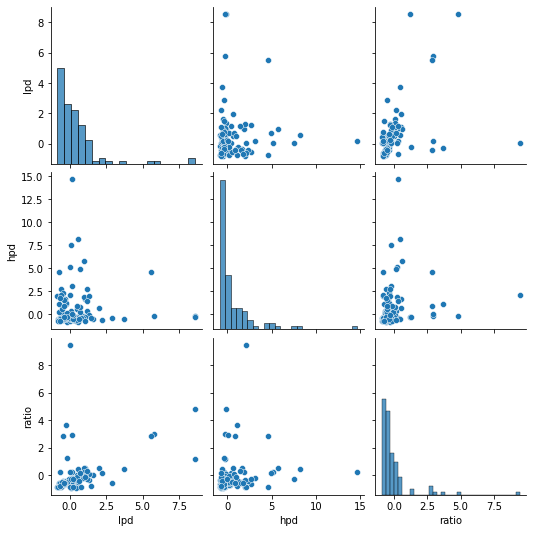

In [30]:
import seaborn as sns
sns.pairplot(df1[['lpd','hpd','ratio']])

In [ ]:
def mklable(a,b):
    if b >= a:
        return 1
    else:
        return 0
    
df['target'] = df.apply(lambda x : mklabel(x[2020],x[2021],))